In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import pandas as pd

In [ ]:
# https://raw.githubusercontent.com/quankiquanki/skytrax-reviews-dataset/master/data/seat.csv
df = pd.read_csv('seat.csv')
df.head()

,airline_name,link,title,author,author_country,date,content,aircraft,seat_layout,date_flown,...,type_traveller,overall_rating,seat_legroom_rating,seat_recline_rating,seat_width_rating,aisle_space_rating,viewing_tv_rating,power_supply_rating,seat_storage_rating,recommended
0,aegean-airlines,/seat-reviews/aegean-airlines,Aegean Airlines customer review,Jay Simpson,United Kingdom,2015-07-20,LHR to Larnaca return. Plane was clean and in ...,A320-200,3x3,19-07-2015,...,Solo Leisure,10.0,4,4,4,5,4.0,NaN,4.0,1
1,aegean-airlines,/seat-reviews/aegean-airlines,Aegean Airlines customer review,Paul Staples,United Kingdom,2013-01-21,For a short haul airline the seats are very go...,AIRBUS A320,3x3,NaN,...,NaN,9.0,4,4,4,4,4.0,NaN,NaN,1
2,aer-lingus,/seat-reviews/aer-lingus,Aer Lingus customer review,L Pulliam,United States,2015-07-07,The seats are a bit tight but bearable. If you...,A330,2x4x2,06-07-2015,...,Couple Leisure,6.0,3,3,3,3,3.0,3.0,3.0,1
3,aer-lingus,/seat-reviews/aer-lingus,Aer Lingus customer review,D Brose,United States,2010-10-22,Appeared new. Good PTV entertainment. Seats ha...,Airbus A330,2x4x2,NaN,...,NaN,5.0,2,3,3,3,4.0,NaN,NaN,0
4,aeroflot-russian-airlines,/seat-reviews/aeroflot-russian-airlines,Aeroflot Russian Airlines customer review,Konstantinos Grimpilakos,Greece,2015-08-02,Boeing 737-800 seats from Athens to Moscow are...,Boeing 737-800,3x3,01-07-2015,...,Business,1.0,1,1,1,2,1.0,5.0,1.0,1


In [ ]:
df.rename(columns = {'content':'review'},inplace =True)

In [ ]:
X_reviews = np.array(df['review'].values,dtype='object')
y = df['recommended']

In [ ]:
y.value_counts()

0    800
1    458
Name: recommended, dtype: int64

***
# Text Pre-processing

<br>

### # Noice Removal

* remove non-printable char (non-ascii and unicode char)

In [ ]:
# All non-printable char are converted to nomal encoding thanks to read_csv of pandas lib

### # Noice Removal

* replace contractions

In [ ]:
con_df = pd.read_csv('contractions.csv')
con_df.head()

,Contraction,Meaning
0,ain't,am not
1,aren't,are not
2,can't,cannot
3,can't've,cannot have
4,'cause,because


In [ ]:
con_dict = {}
for _idx,Contraction,Meaning in con_df.itertuples():
    con_dict[Contraction] = Meaning

In [ ]:
import re

In [ ]:
print('(%s)' % '|'.join(con_dict.keys()))

(ain't|aren't|can't|can't've|'cause|could've|couldn't|couldn't've|didn't|doesn't|don't|hadn't|hadn't've|hasn't|haven't|he'd|he'd've|he'll|he'll've|he's|how'd|how'd'y|how'll|how's|i'd|i'd've|i'll|i'll've|i'm|i've|isn't|it'd|it'd've|it'll|it'll've|it's|let's|ma'am|mayn't|might've|mightn't|mightn't've|must've|mustn't|mustn't've|needn't|needn't've|o'clock|oughtn't|oughtn't've|shan't|sha'n't|shan't've|she'd|she'd've|she'll|she'll've|she's|should've|shouldn't|shouldn't've|so've|so's|that'd|that'd've|that's|there'd|there'd've|there's|they'd|they'd've|they'll|they'll've|they're|they've|to've|wasn't|we'd|we'd've|we'll|we'll've|we're|we've|weren't|what'll|what'll've|what're|what's|what've|when's|when've|where'd|where's|where've|who'll|who'll've|who's|who've|why's|why've|will've|won't|won't've|would've|wouldn't|wouldn't've|y'all|y'alls|y'all'd|y'all'd've|y'all're|y'all've|you'd|you'd've|you'll|you'll've|you're|you've)


In [ ]:
# https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
con_re = re.compile('(%s)' % '|'.join(con_dict.keys()))

def expandContractions(text, con_re=con_re):
    def replace(match):
        return con_dict[match.group()]
    return con_re.sub(replace, text.lower())

In [ ]:
for idx in range(0,X_reviews.size):
    X_reviews[idx] = expandContractions(X_reviews[idx])

<br>

### # Tokenization
* sent_tokenize

In [ ]:
from nltk.tokenize import sent_tokenize

In [ ]:
for idx in range(0,X_reviews.size):
    X_reviews[idx] = np.array(sent_tokenize(X_reviews[idx]),dtype='object')

<br>

### # Noice Removal

* remove punctuations

In [ ]:
import string

In [ ]:
blank = str.maketrans('','',string.punctuation)

for idx in range(0,X_reviews.size):
    for jdx in range (0,X_reviews[idx].size):
        X_reviews[idx][jdx] = X_reviews[idx][jdx].translate(blank)

<br>

### # Tokenization
* word_tokenize

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
for idx in range(0,X_reviews.size):
    for jdx in range (0,X_reviews[idx].size):
        X_reviews[idx][jdx] = np.array(word_tokenize(X_reviews[idx][jdx]),dtype='object')

<br>

### # Noice Removal

* remove stopwords

In [ ]:
from nltk.corpus import stopwords

In [ ]:
sw_ = stopwords.words('english')

for idx in range(0,X_reviews.size):
    for jdx in range (0,X_reviews[idx].size):
        sw_idxs = []
        for kdx in range (0,X_reviews[idx][jdx].size):
            if X_reviews[idx][jdx][kdx] in sw_:
                sw_idxs.append(kdx)
        X_reviews[idx][jdx] = np.delete(X_reviews[idx][jdx], sw_idxs)

<br>

***
## Updating dataFrame
<br>

In [ ]:
content =[]

for idx in range (0,X_reviews.size):
    content.append(' '.join([' '.join(sentence) for sentence in X_reviews[idx]]))
    
df['review'] = content

In [ ]:
df[['review']].head()

,review
0,lhr larnaca return plane clean good condition ...
1,short haul airline seats good find seats comfo...
2,seats bit tight bearable courteous others cour...
3,appeared new good ptv entertainment seats tigh...
4,boeing 737800 seats athens moscow small table ...


***


<center><i><h1> Unsupervised </h1></i></center>



<br>
<br>
<br>

# Feature Extraction
### # Part-of-Speech Tagging
* Each word in bag of word is assigned to respective POS.
* Used to identify verb, adjective in case of _"sentiment mining"_ .

In [ ]:
from nltk import pos_tag

In [ ]:
pos_tag_list = []

for review in X_reviews:
    rev_list = [pos_tag(sentence) for sentence in review]
    pos_tag_list.append(rev_list)

In [ ]:
print(pos_tag_list)

[[[('lhr', 'JJ'), ('larnaca', 'NN'), ('return', 'NN')], [('plane', 'NN'), ('clean', 'JJ'), ('good', 'JJ'), ('condition', 'NN')], [('drinks', 'NNS'), ('served', 'VBD'), ('throughout', 'IN'), ('flights', 'NNS')], [('food', 'NN'), ('good', 'NN')], [('would', 'MD'), ('definitely', 'RB'), ('hesitate', 'VB'), ('use', 'NN'), ('airline', 'NN'), ('european', 'JJ'), ('trips', 'NNS')]], [[('short', 'JJ'), ('haul', 'NN'), ('airline', 'NN'), ('seats', 'NNS'), ('good', 'JJ')], [('find', 'VB'), ('seats', 'NNS'), ('comfortable', 'JJ'), ('plenty', 'JJ'), ('leg', 'NN'), ('room', 'NN')]], [[('seats', 'NNS'), ('bit', 'VBP'), ('tight', 'JJ'), ('bearable', 'NN')], [('courteous', 'JJ'), ('others', 'NNS'), ('courteous', 'JJ')], [('everyone', 'NN'), ('seat', 'NN'), ('ask', 'VB'), ('neighbor', 'NN'), ('front', 'JJ'), ('back', 'RB'), ('issues', 'NNS'), ('come', 'VBP'), ('good', 'JJ')]], [[('appeared', 'VBD'), ('new', 'JJ')], [('good', 'JJ'), ('ptv', 'NN'), ('entertainment', 'NN')], [('seats', 'NNS'), ('tight', '

### # Bag of words
* feature vector containing all the words in text

### # Dependency Parse Trees
* Sectences are structured by identifying the grammatical relationship among words to from shorter sentences
* Phrase extraction at min level

### # Part-of-Speech Tagging
* Each word in bag of word is assigned to respective POS.
* Used to identify verb, adjective in case of _"sentiment mining"_ .

### # Named Entity Recognition
* Identify noun  from text and Classify them.

### # Negation Identification
* Detecting sarcasm and flaging them.

### # Collocation (n-gram feature)
* Identifying relationship between words
* Extract feature by grouping.

### # Word  Sense Disambiguation 
* Identify right sense of word _(same word may be used as noun and verb with completly dif. meaning)_

<br>

### # Lexical Normalization (Noice Removal)
* Stemming (removes suffixes) (Faster)
* Lemmatization (converting to thier grammertical root) (Better)


### # Word Standardization (Noice Removal) _[Not included in example]_
* Extract meaning from text, convert shorthand,ackronyms and bad formating to real words
* Spell Check


In [ ]:
from nltk.corpus import wordnet as wn

In [ ]:
def get_wordnet_pos(nltk_tag):

    if nltk_tag.startswith('J'):
        return wn.ADJ
    elif nltk_tag.startswith('V'):
        return wn.VERB
    elif nltk_tag.startswith('R'):
        return wn.ADV
    else:
        return wn.NOUN

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn

In [ ]:
lemmatizer = WordNetLemmatizer()
length = len(pos_tag_list) # == X_reviews.size

In [ ]:
sentiment_list=[];

In [ ]:
for idx in range(0,length):
    sentiment = 0.0;   #find sentiment of whole review
    for sentence in pos_tag_list[idx]:
        for word,tag in sentence:
            lemma = lemmatizer.lemmatize(word,get_wordnet_pos(tag))
            if not lemma:
                continue
            
            synset = wn.synsets(lemma,get_wordnet_pos(tag))
            if not synset:
                continue
            
            swn_synset = swn.senti_synset(synset[0].name())
            sentiment += swn_synset.pos_score() - swn_synset.neg_score()
            
    sentiment_list.append(sentiment)

In [ ]:
sentiment_list

[1.5,
 0.0,
 2.375,
 -0.625,
 -1.125,
 1.0,
 -0.25,
 1.375,
 -0.5,
 0.625,
 2.75,
 1.75,
 -1.125,
 3.0,
 -0.5,
 -2.25,
 0.75,
 0.0,
 0.875,
 1.5,
 -0.75,
 0.75,
 1.5,
 0.5,
 1.0,
 -0.125,
 0.625,
 2.75,
 -0.125,
 2.375,
 -1.375,
 -0.625,
 -2.375,
 2.5,
 0.875,
 1.125,
 1.5,
 -0.625,
 -0.25,
 -0.75,
 -0.75,
 -1.375,
 0.375,
 -1.625,
 0.375,
 1.0,
 2.0,
 0.0,
 1.375,
 0.5,
 6.625,
 1.75,
 -1.75,
 -2.375,
 -2.125,
 -3.0,
 0.25,
 -2.375,
 -0.75,
 2.5,
 0.125,
 -1.625,
 0.0,
 -1.25,
 -2.125,
 0.375,
 -1.625,
 -0.375,
 -1.875,
 0.0,
 -1.625,
 0.125,
 2.125,
 -1.125,
 -3.125,
 0.0,
 0.875,
 -2.0,
 0.75,
 1.75,
 -3.125,
 -6.375,
 -2.125,
 2.625,
 -2.0,
 0.625,
 0.0,
 -0.5,
 0.0,
 -1.125,
 -3.125,
 -0.25,
 1.25,
 0.125,
 -4.181,
 0.0,
 -0.25,
 -0.375,
 -1.125,
 -0.875,
 -3.5,
 1.25,
 -1.125,
 -2.625,
 4.25,
 2.375,
 -0.375,
 -1.125,
 -2.0,
 -1.0,
 -4.125,
 -2.5,
 1.0,
 0.75,
 -1.125,
 -0.125,
 0.125,
 -1.25,
 -4.625,
 0.5,
 0.625,
 0.375,
 0.0,
 -3.125,
 1.513,
 -3.25,
 -1.75,
 -0.875,
 -3.0,
 

### but what is the threshold for recommendation?

In [ ]:
def predict(sentiment_list,threshold):
    y = [];
    for idx in range (0,len(sentiment_list)):
        if sentiment_list[idx] <= threshold:
            y.append(0)
        elif sentiment_list[idx] > threshold:
            y.append(1)
    return y;

In [ ]:
def accuracy(sentiment_list,threshold): # same as sklearn.metric.accuracy
    return np.round((sum(np.where((predict(sentiment_list,threshold)==y), 1, 0))/X_reviews.size),4)

In [ ]:
X_thresholds = np.round(np.linspace(-2 ,2,40),2)

In [ ]:
Y_scores = [accuracy(sentiment_list,x) for x in X_thresholds]

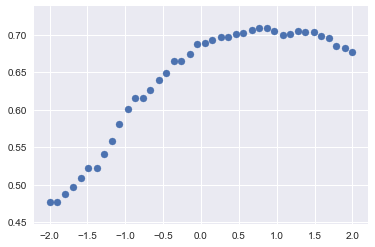

In [ ]:
plt.scatter(X_thresholds,Y_scores)

In [ ]:
threshold = X_thresholds[Y_scores.index(max(Y_scores))]
threshold

0.77

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
y_predict = predict(sentiment_list,threshold)

In [ ]:
print("accuracy score: {0:.4f}\n".format(accuracy_score(y, y_predict)))
print("Classification Report: \n {}\n".format(classification_report(y, y_predict)))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y, y_predict)))

accuracy score: 0.7083

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.86      0.79       800
           1       0.64      0.45      0.53       458

   micro avg       0.71      0.71      0.71      1258
   macro avg       0.69      0.65      0.66      1258
weighted avg       0.70      0.71      0.69      1258


Confusion Matrix: 
 [[687 113]
 [254 204]]



***


<center><i><h1> Supervised </h1></i></center>



<br>
<br>
<br>

## # Tf-Idf (Feature Extraction)
* Term frequency-inverse document frequency
* Used instead of word Count

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df[['review']],df['recommended'],test_size=0.3)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
count_vector = CountVectorizer() # one hot encoding

X_train_vect = count_vector.fit_transform(X_train['review'])
X_test_vect = count_vector.transform(X_test['review'])

In [ ]:
print(count_vector.vocabulary_)

{'comfortable': 1277, 'seats': 4151, 'excellent': 1937, 'service': 4201, 'even': 1920, 'though': 4760, 'flight': 2108, 'full': 2200, 'felt': 2052, '12': 27, 'hour': 2445, 'lax': 2800, 'icn': 2474, 'incheon': 2527, 'korea': 2748, 'lhr': 2860, 'worst': 5210, 'ever': 1924, 'life': 2884, 'rock': 4040, 'hard': 2337, 'backside': 823, 'numb': 3316, 'pain': 3459, 'entirety': 1887, 'media': 3070, 'screen': 4133, 'tiny': 4792, 'working': 5199, 'properly': 3709, 'earphones': 1787, 'handed': 2317, 'disaster': 1666, 'whole': 5158, 'plane': 3573, 'feels': 2047, 'looks': 2941, 'dated': 1518, 'one': 3370, 'air': 578, 'chinas': 1197, 'newer': 3261, 'planes': 3576, 'seat': 4142, 'pretty': 3671, 'standard': 4491, 'fair': 2007, 'much': 3195, 'better': 901, 'b777': 807, 'less': 2846, 'shoulder': 4260, 'room': 4047, 'new': 3257, 'large': 2774, 'ptvs': 3733, 'although': 633, 'claimed': 1214, 'touch': 4825, 'demand': 1580, 'ones': 3371, 'actually': 504, '15': 55, 'looped': 2942, 'channels': 1161, 'entertainme

In [ ]:
print(X_test_vect.toarray(),'\t shape:',X_test_vect.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 	 shape: (378, 5268)


In [ ]:
CountVectorizer?

In [ ]:
count_vector.inverse_transform(X_test_vect[0])

[array(['ability', 'bad', 'chair', 'cushioning', 'end', 'ever', 'folding',
        'hours', 'hurt', 'lack', 'leg', 'like', 'metal', 'nice', 'padding',
        'paid', 'rear', 'recline', 'room', 'seat', 'seats', 'sitting',
        'thin', 'three', 'uncomfortable'], dtype='<U24')]

In [ ]:
X_test['review'].head()

174    uncomfortable seats ever displeasure sitting t...
311    nightmare overnight joburg heathrow room elbow...
609    seat pitch feels like budget carrier eg easy j...
893    perthlondon return 777 3 4 flights 37a 28c 27c...
605    terribly uncomfortable seat airline taken foot...
Name: review, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
tfidf_Transformer = TfidfTransformer()

X_train_tfidf = tfidf_Transformer.fit_transform(X_train_vect)
X_test_tfidf = tfidf_Transformer.transform(X_test_vect)

<br>

# Naive Bayes:

In [ ]:
from sklearn.naive_bayes import ComplementNB #BernoulliNB #GaussianNB #MultinomialNB

In [ ]:
nb_clf = ComplementNB()

nb_clf.fit(X_train_tfidf.toarray(),y_train) 

ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score

In [ ]:
print("Train Result:\n")
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, nb_clf.predict(X_train_tfidf.toarray()))))
print("Classification Report: \n {}\n".format(classification_report(y_train, nb_clf.predict(X_train_tfidf.toarray()))))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, nb_clf.predict(X_train_tfidf.toarray()))))

res = cross_val_score(nb_clf, X_train_tfidf, y_train, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

Train Result:

accuracy score: 0.9489

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       555
           1       0.98      0.88      0.93       325

   micro avg       0.95      0.95      0.95       880
   macro avg       0.96      0.93      0.94       880
weighted avg       0.95      0.95      0.95       880


Confusion Matrix: 
 [[550   5]
 [ 40 285]]

Average Accuracy: 	 0.8201
Accuracy SD: 		 0.0420


In [ ]:
print("Test Result:\n")        
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, nb_clf.predict(X_test_tfidf.toarray()))))
print("Classification Report: \n {}\n".format(classification_report(y_test, nb_clf.predict(X_test_tfidf.toarray()))))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, nb_clf.predict(X_test_tfidf.toarray()))))

Test Result:

accuracy score: 0.7989

Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.98      0.86       245
           1       0.91      0.47      0.62       133

   micro avg       0.80      0.80      0.80       378
   macro avg       0.84      0.72      0.74       378
weighted avg       0.82      0.80      0.78       378


Confusion Matrix: 
 [[239   6]
 [ 70  63]]



***

## SVM:

In [ ]:
from sklearn im`port svm

In [ ]:
clf = svm.SVC(kernel='linear',C=1.2)
clf.fit(X_train_tfidf,y_train)

SVC(C=1.2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [ ]:
print("Train Result:\n")
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train_tfidf.toarray()))))
print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train_tfidf.toarray()))))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train_tfidf.toarray()))))

res = cross_val_score(clf, X_train_tfidf, y_train, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

Train Result:

accuracy score: 0.9807

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       555
           1       0.98      0.97      0.97       325

   micro avg       0.98      0.98      0.98       880
   macro avg       0.98      0.98      0.98       880
weighted avg       0.98      0.98      0.98       880


Confusion Matrix: 
 [[549   6]
 [ 11 314]]

Average Accuracy: 	 0.8432
Accuracy SD: 		 0.0345


In [ ]:
print("Test Result:\n")        
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test_tfidf.toarray()))))
print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test_tfidf.toarray()))))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test_tfidf.toarray()))))

Test Result:

accuracy score: 0.8439

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.91      0.88       245
           1       0.81      0.73      0.77       133

   micro avg       0.84      0.84      0.84       378
   macro avg       0.83      0.82      0.82       378
weighted avg       0.84      0.84      0.84       378


Confusion Matrix: 
 [[222  23]
 [ 36  97]]



<br><br><br>
***